#**Machine Learning Regression: Data Processing, Model Implementation, and Error Analysis with Pandas and Scikit-Learn**

#**Data Processing with Pandas**

Working with DataFrames and Series

In the **California Housing dataset**, the term "**instances**" refers to the **number of data points (rows) in the dataset**.

**Definition of Instances**

- Each **instance** represents **one row of data** in the dataset.
- In this case, **20640 instances** mean there are **20640 different housing samples** collected from California.
- Each instance represents **one observation** in the dataset.
- The dataset has **20640 houses**, each with **8 attributes (features)**.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)
# The 'as_frame' parameter in 'fetch_california_housing(as_frame=True)' determines whether the dataset should be returned as a pandas DataFrame instead of a NumPy array.
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [2]:
california_housing.data.head() # the method .head() is a pandas DataFrame function that displays the first five rows of the dataset by default.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In the **California Housing dataset**, the `.target` attribute contains the **target variable (dependent variable)**, which represents **the median house value** in a given California block.

- `california_housing.target` is a **pandas Series** (because `as_frame=True` was used).
- `.head()` shows the first 5 values.

In [3]:
california_housing.target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


The `california_housing.frame.info()` provides a **summary of the entire dataset**.

(It is useful for checking missing values and data types.)

In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Load dataset as a DataFrame
df = california_housing.data.copy() # Make a copy to avoid modifying the original

In [6]:
type(df)

pandas.core.frame.DataFrame

To compute the **total number of bedrooms** and **total number of rooms** in the California Housing dataset, we need to multiply the **average number of bedrooms per household** (`AveBedrms`) and **average number of rooms per household** (`AveRooms`) by the **total number of households**.

Since the dataset does not provide the number of households explicitly, we can estimate it using the **population** (`Population`) and **average household size** (`AveOccup`):

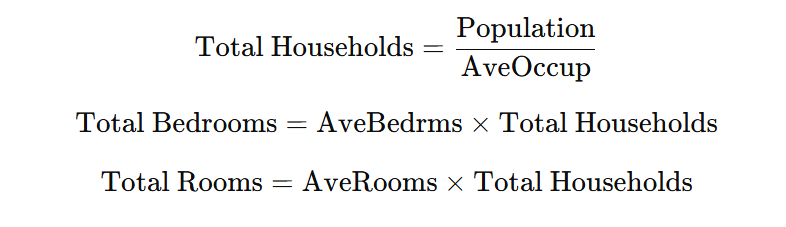

Used `.loc[:, 'column_name']` below to ensure new columns are properly created before being used.
[The `.loc function` in Pandas stands for **"location-based indexing"**. It is used to **access and modify rows and columns** in a DataFrame **based on labels**.]

In [7]:
df.columns = df.columns.str.strip()

# Ensure required columns exist and remove rows where 'AveOccup' is zero
if {'Population', 'AveOccup', 'AveBedrms', 'AveRooms'}.issubset(df.columns):
    df = df[df['AveOccup'] > 0]  # Remove rows where 'AveOccup' is zero

    # Compute total values
    df['Total_Households'] = df['Population'] / df['AveOccup']
    df['Total_Bedrooms'] = df['AveBedrms'] * df['Total_Households']
    df['Total_Rooms'] = df['AveRooms'] * df['Total_Households']
else:
    print("Error: Missing required columns in DataFrame")

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Total_Households,Total_Bedrooms,Total_Rooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,126.0,129.0,880.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1138.0,1106.0,7099.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,177.0,190.0,1467.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,219.0,235.0,1274.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,259.0,280.0,1627.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,330.0,374.0,1665.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,114.0,150.0,697.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,433.0,485.0,2254.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,349.0,409.0,1860.0


###**Plotted on a Scatter Plot**

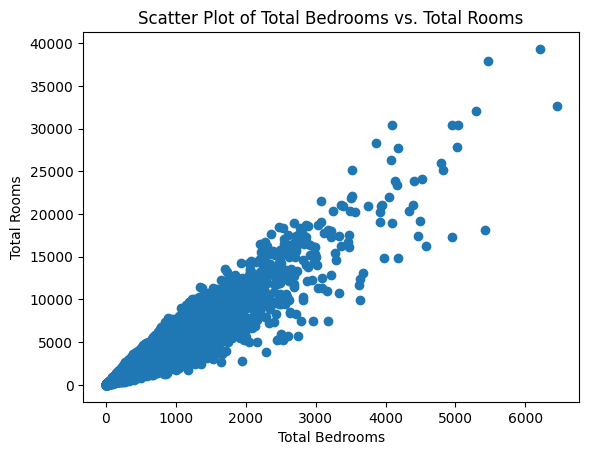

Each blue point is an area in California!


In [9]:
total_bedrooms_np = df['Total_Bedrooms'].to_numpy()
total_rooms_np = df['Total_Rooms'].to_numpy()

import matplotlib.pyplot as plt

plt.scatter(total_bedrooms_np, total_rooms_np)
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Scatter Plot of Total Bedrooms vs. Total Rooms')
plt.show()

print('Each blue point is an area in California!')

#**Regression Analysis (Simple Linear Regression on Data)**

- Draw a line through the data
- Linear Model can be used to predict the total number of rooms.

###**Why use `.reshape((-1,1))`?**

The `reshape((-1,1))` is used to **convert a 1D array into a 2D column vector** because **`LinearRegression.fit()` expects a 2D input array (features matrix)**.

---
- `LinearRegression.fit()` requires **a 2D feature array**, but here it's just a **single column** (which is why reshaping is necessary).
---
```python
total_bedrooms_np.reshape((-1,1))
```
Now, the shape becomes:
```
(20640, 1)
```
- `-1` automatically calculates the correct number of rows (**20640**).
- `1` ensures that the array is treated as **a single feature column**.

In [10]:
print(total_bedrooms_np.shape)

(20640,)


#### **What does `np.linspace(0, 7000, num=2000)` do?**
The **`np.linspace()` function** (from NumPy) generates an array of evenly spaced numbers over a specified range.

**Breaking it down:**
```python
dummy_inputs = np.linspace(0, 7000, num=2000)
```
- **`0`** → The starting value of the range.
- **`7000`** → The ending value of the range.
- **`num=2000`** → The number of points to generate.

### **Why use `linspace()`?**
- Provides **smooth** and **continuous values** for plotting the regression line.
- Ensures predictions **cover a wide range** of possible inputs.

---

#### **What is `.predict()` and which Library is it from?**
- `.predict()` is a method from the **`sklearn.linear_model.LinearRegression`** class.
- It is used to **make predictions** based on the trained linear regression model.


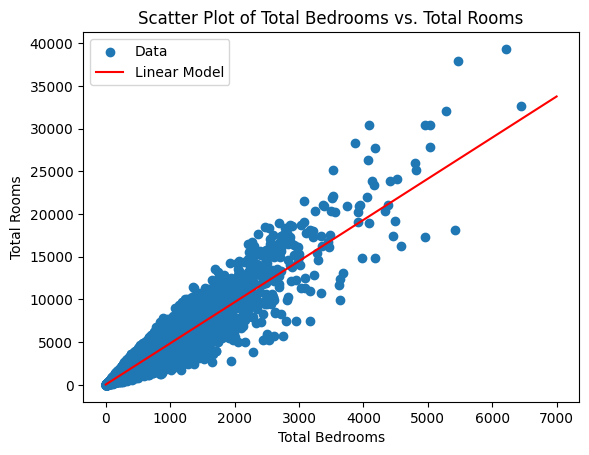

In [11]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(total_bedrooms_np.reshape((-1,1)), total_rooms_np)

import numpy as np
dummy_inputs = np.linspace(0, 7000, num=2000)
dummy_predictions = linear_model.predict(dummy_inputs.reshape((-1,1)))

'''
The plt.plot() function in Matplotlib is used to plot a line graph.

Syntax of plt.plot() for the Regression Line -
plt.plot(x_values, y_values, label='Label Name', color='color_name', linestyle='line_style', linewidth=line_width)

'''

plt.scatter(total_bedrooms_np, total_rooms_np, label='Data')
plt.plot(dummy_inputs, dummy_predictions, label='Linear Model', color='red')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Scatter Plot of Total Bedrooms vs. Total Rooms')
plt.legend()
plt.show()

#**Error Analysis**
  **Performance Metrics:**
- Total Absolute Error (TAE)
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

### **Total Absolute Error (TAE) Function**
The **Total Absolute Error (TAE)** is a performance metric that calculates the **sum of absolute differences** between actual values and predicted values. It is defined as:
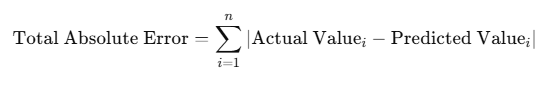

In [12]:
x = np.sum(np.abs(linear_model.predict(total_bedrooms_np.reshape((-1,1))) - total_rooms_np))
print(f"Total Absolute Error: {x:,.2f}")


Total Absolute Error: 10,230,298.65


### **Mean Absolute Error (MAE) Function**
The **Mean Absolute Error (MAE)** measures the **average** absolute difference between actual values and predicted values. It is defined as:
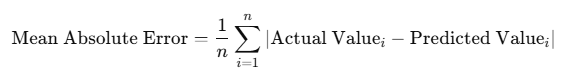

In [13]:
'''
The `metrics` module in Scikit-Learn provides a collection of functions to evaluate the performance of machine learning models.
These functions include error measurements for regression models, classification models, and clustering algorithms.
'''

from sklearn.metrics import mean_absolute_error as mae
mae(linear_model.predict(total_bedrooms_np.reshape((-1,1))), total_rooms_np)

495.6540043534659

### **Mean Squared Error (MSE) Function**
The **Mean Squared Error (MSE)** measures the **average squared difference** between actual values and predicted values. It is commonly used in regression problems to evaluate the accuracy of a model.

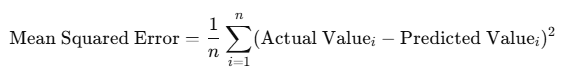

In [14]:
from sklearn.metrics import mean_squared_error as mse
mse(linear_model.predict(total_bedrooms_np.reshape((-1,1))), total_rooms_np)

643913.9247382275

### **Root Mean Squared Error (RMSE)**
The **Root Mean Squared Error (RMSE)** is the **square root** of the **Mean Squared Error (MSE)**:
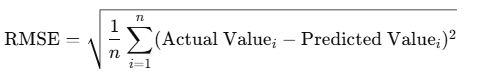
### **Why Use RMSE?**
- **Interpretable** → Expresses error in the same units as the target variable.  
- **Sensitive to Large Errors** → Penalizes large deviations more than MAE.  
- **Used in Regression** → Commonly used to measure model accuracy.


In [15]:
mse_value = mse(linear_model.predict(total_bedrooms_np.reshape((-1,1))), total_rooms_np)
rmse_value = mse_value ** 0.5  # Taking the square root

print(f"Mean Squared Error (MSE): {mse_value}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")

Mean Squared Error (MSE): 643913.9247382275
Root Mean Squared Error (RMSE): 802.4424744106132


#**References**
- Inria Scikit-learn MOOC: [The California housing dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)  
- Greg Hogg. [YouTube Video: Error / Loss Functions for Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE), RMSE](https://youtu.be/Wk8vycBT4qM?si=Ezs-wAygZzs9B_Rv)
- Official Pandas Documentation: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  
- Official Scikit-learn Documentation: [https://scikit-learn.org/](https://scikit-learn.org/)  
